# Dataset Background 


This supermarket dataset is a collection of data that provides information about the transactions that took place in a supermarket. This dataset typically includes information such as the date and time of the transaction, the products that were purchased, the price of each product, the total amount spent on the transaction, and other relevant details.

We will use this dataset to perform data analysis and gain insights into the behavior of the supermarket customers. For example, we might use this supermarket dataset to study the relationship between the day of the week and the total amount spent on transactions

# Some Feature Description

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Date: Date of purchase (Record available from January 2019 to March 2019)

Date: Date of purchase (Record available from January 2019 to March 2019)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
df=pd.read_csv(r"C:\Users\otaku7\Downloads\archive (6)\supermarket_sales - Sheet1.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# Understanding of Data

In [3]:
df.shape

(1000, 17)

In [4]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [7]:
df.describe(include="object").T

,count,unique,top,freq
Invoice ID,1000,1000,750-67-8428,1
Branch,1000,3,A,340
City,1000,3,Yangon,340
Customer type,1000,2,Member,501
Gender,1000,2,Female,501
Product line,1000,6,Fashion accessories,178
Date,1000,89,2/7/2019,20
Time,1000,506,19:48,7
Payment,1000,3,Ewallet,345


# Cleaning of Data

In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
#Converting date column to datetime datatype
df['Date']=pd.to_datetime(df["Date"])

In [10]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [13]:
# Separate the day and month from the date into two separate columns
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.weekday

In [14]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,6
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,6
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,4


In [16]:
# adding col income 
df["income"]=df["Total"]*df["gross margin percentage"]
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day,income
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5,2614.15
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,4,382.00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,6,1621.55
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,6,2328.80
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,4,3020.85


In [17]:
# see what are the unique values in col month to replace it with name of month
df['month'].unique()

array([1, 3, 2], dtype=int64)

In [19]:
df["month"]=df["month"].replace({1:"january"})
df["month"]=df["month"].replace({2:"february"})
df["month"]=df["month"].replace({3:"march"})
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day,income
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,january,5,2614.15
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,march,4,382.00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,march,6,1621.55
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,january,6,2328.80
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,february,4,3020.85


In [20]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
month                              object
day                                 int64
income                            float64
dtype: object

In [21]:
#checkin outliers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000
day,1000.0,3.032000,1.973543e+00,0.000000,1.000000,3.000000,5.000000,6.000000
income,1000.0,1537.936900,1.170883e+03,50.850000,592.487500,1208.800000,2244.525000,4965.000000


we can see in some columns there is big difference between 75% to max(like in total column 471.3 to 1042.6 and in column cogs 448 to 993 so it indicates there is an outlier in data

# Insights of data

### what is Total sale and income of each branch?

In [31]:
print("Total sale")
df.groupby(["Branch"])["Total"].sum()

Total sale


Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

In [33]:
print("income")
df.groupby(["Branch"])["income"].sum()

income


Branch
A    505716.050010
B    505703.200010
C    526517.650011
Name: income, dtype: float64

Highest sale and income was recored at Branch C

### Find Correlation between Total sale and income

In [35]:
x1=df[["Total","income"]].corr()
x1

,Total,income
Total,1.0,1.0
income,1.0,1.0


otal sales and income is perfectly correlated means sale increases income increases and vive versa

 ### what is Total sale of all months for each branch?

In [39]:
df.groupby(["Branch","month"])["Total"].sum()

Branch  month   
A       february    29860.1205
        january     38681.1285
        march       37659.1215
B       february    34424.2710
        january     37176.0585
        march       34597.3425
C       february    32934.9825
        january     40434.6810
        march       37199.0430
Name: Total, dtype: float64

highest sale was recorded in January at Branch C.
and highest sale among all branches was in january

### Find week days and weekend sale of all branches

In [41]:
# week day from 0 : 4 , weekend 5,6
week_day=df[df['day']<5]
weekend=df[df['day']>=5]

In [43]:
print("weekdays sale : ",week_day["Total"].sum())
print("weekends sale : ",weekend["Total"].sum())

weekdays sale :  222388.04700000002
weekends sale :  100578.702


### Find week days and weekend sale of all branches

In [45]:
print("week days sale of all branches \n")
print(week_day.groupby(["Branch"])["Total"].sum())
print("weekends days sale of all barnches \n")
print(weekend.groupby(["Branch"])["Total"].sum())

week days sale of all branches 

Branch
A    72428.139
B    74497.920
C    75461.988
Name: Total, dtype: float64
weekends days sale of all barnches 

Branch
A    33772.2315
B    31699.7520
C    35106.7185
Name: Total, dtype: float64


week day and weekend sale at branch C was highest
So business managers should choose Happy Weekend Sale in order to make discount/bumper sale scheme to get more sales

### Find Highest, Lowest and Average sales record of each branch on any day

In [48]:
df.groupby(["Branch"])["Total"].agg(["max","min","mean"])

,max,min,mean
Branch,,,
A,1039.29,12.6945,312.354031
B,1022.49,18.6375,319.872506
C,1042.65,10.6785,337.099715


at Branch C contributed highest sale and lowest sale  1042.65 and 10.6785 respectively on any day

In [49]:
# at which date highest sale was recorded at C branch
df[(df["Total"]==df["Total"].max()) & (df["Branch"]=="C")][["Date"]]

,Date
350,2019-02-15


In [51]:
#What was the category of customer and its corresponding product category at this data?
df[df["Total"]==df["Total"].max()][["Branch","Date","Customer type","Product line"]]

,Branch,Date,Customer type,Product line
350,C,2019-02-15,Member,Fashion accessories


### At which date and month lowest sale had been done at C branch

In [52]:
df[(df["Total"]==df["Total"].min()) & (df["Branch"]=="C")][["month","Date"]]

,month,Date
822,february,2019-02-07


In [53]:
#What was the category of customer and its corresponding product category at this data?
df[df["Total"]==df["Total"].min()][["Branch","Date","Customer type","Product line"]]

,Branch,Date,Customer type,Product line
822,C,2019-02-07,Member,Sports and travel


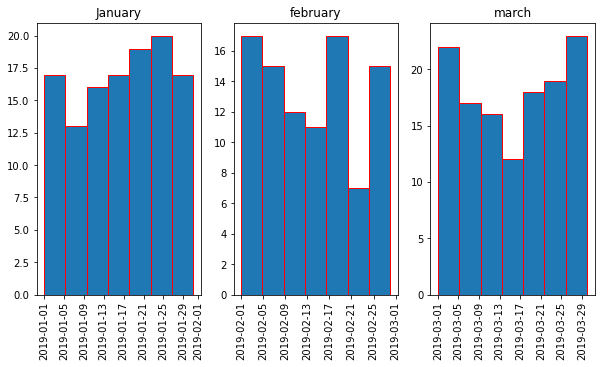

In [59]:
#visiual representation of Date wise Customers visiting trend of Branch A for each months
plt.figure(figsize = (10,5))
a=df[(df["Branch"] =="A")]
a_jan=a[a["month"]=="january"]
plt.subplot(1,3,1)
plt.hist(a_jan["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("January")
a_feb=a[a["month"]=="february"]
plt.subplot(1,3,2)
plt.hist(a_feb["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("february")
a_march=a[a["month"]=="march"]
plt.subplot(1,3,3)
plt.hist(a_march["Date"],edgecolor="red",bins=7)
plt.xticks(rotation = 90)
plt.title("march")
plt.show()

### Find product demand of customers for each branch



In [60]:
df.groupby(["Branch"])["Product line"].value_counts()

Branch  Product line          
A       Home and lifestyle        65
        Electronic accessories    60
        Sports and travel         59
        Food and beverages        58
        Fashion accessories       51
        Health and beauty         47
B       Fashion accessories       62
        Sports and travel         62
        Electronic accessories    55
        Health and beauty         53
        Food and beverages        50
        Home and lifestyle        50
C       Food and beverages        66
        Fashion accessories       65
        Electronic accessories    55
        Health and beauty         52
        Home and lifestyle        45
        Sports and travel         45
Name: Product line, dtype: int64

At branch A : customers demand for Home and lifestyle product was highest

At branch B : customers demand for Fashion accessories product was highest

At branch C : customers demand for Food and beverages product was highest

In [61]:
#Find Sales of each product
df.groupby(["Product line"])["Total"].sum()

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

In [62]:
#Find Product wise sale trend of each branch
df.groupby(["Branch","Product line"])["Total"].sum()


Branch  Product line          
A       Electronic accessories    18317.1135
        Fashion accessories       16332.5085
        Food and beverages        17163.1005
        Health and beauty         12597.7530
        Home and lifestyle        22417.1955
        Sports and travel         19372.6995
B       Electronic accessories    17051.4435
        Fashion accessories       16413.3165
        Food and beverages        15214.8885
        Health and beauty         19980.6600
        Home and lifestyle        17549.1645
        Sports and travel         19988.1990
C       Electronic accessories    18968.9745
        Fashion accessories       21560.0700
        Food and beverages        23766.8550
        Health and beauty         16615.3260
        Home and lifestyle        13895.5530
        Sports and travel         15761.9280
Name: Total, dtype: float64

At branch A the sale of Home and lifestyle product was high i.e 22417.1955

At branch B the sale of Sports and travel product was high i.e 19988.1990

At branch C the sale of Food and beverages product was high i.e 23766.8550

In [64]:
# Find Monthly sale of each product
df.groupby(["Product line","month"])["Total"].sum()


Product line            month   
Electronic accessories  february    17362.9050
                        january     18831.2880
                        march       18143.3385
Fashion accessories     february    19009.8615
                        january     19345.1160
                        march       15950.9175
Food and beverages      february    20000.3580
                        january     19570.5300
                        march       16573.9560
Health and beauty       february    14602.2555
                        january     16383.1710
                        march       18208.3125
Home and lifestyle      february    12434.3835
                        january     20494.7400
                        march       20932.7895
Sports and travel       february    13809.6105
                        january     21667.0230
                        march       19646.1930
Name: Total, dtype: float64

In [65]:
#Which branch has highest customers ?
df.groupby(["Branch"])["Customer type"].count()


Branch
A    340
B    332
C    328
Name: Customer type, dtype: int64

In [66]:
#Find Customers type count of each branch
df.groupby(["Branch"])["Customer type"].value_counts()


Branch  Customer type
A       Normal           173
        Member           167
B       Normal           167
        Member           165
C       Member           169
        Normal           159
Name: Customer type, dtype: int64

In [67]:
#Find Highest,lowest and average rating to the company
df["Rating"].agg(["max","min","mean"])

max     10.0000
min      4.0000
mean     6.9727
Name: Rating, dtype: float64

In [69]:
#How many customers had given 10 ratings ?
len(df[df["Rating"]==10.0])

5

In [70]:
#How many customers had given 4 ratings ?
len(df[df["Rating"]==4.0])

11

In [72]:
#How many customers had given below or equals 6 ratings ?
len(df[df["Rating"]<=6.0])

341

In [74]:
#Find the maximum,minimum and average rating at each branch
df.groupby(["Branch"])["Rating"].agg(["max","min","mean"])


,max,min,mean
Branch,,,
A,10.0,4.0,7.027059
B,10.0,4.0,6.818072
C,10.0,4.0,7.072866
